# BIKE SHARING - LINEAR REGRESSION

####                               Submitted by Monica Gowda

### PROBLEM STATEMENT:
Build a multiple linear regression model for the prediction of demand for shared bikes.

The company whats to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

### BUSINESS GOAL:
 The model will be used by management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# _`Data Visualisation`_

In [178]:
#importing libraries for visualisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [179]:
#create bike dataframe
bikeSharing=pd.read_csv('day.csv')

In [180]:
#read 5 rows of df
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [181]:
#check the shape
bikeSharing.shape 

(730, 16)

In [182]:
#check dataframe for null and datatype 
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [183]:
#check the details of numeriacl data
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [184]:
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Below columns are not required for our model, reason given in <font color=red> red </font>
- instant: record index => <font color=red> this is the index of the dataset and will not be required for modeling </font>
- dteday : date => <font color=red> other columns in dataset like yr, mnth, weekday..etc will give same information as dteday, hence this is redundant </font>
- casual: count of casual users => <font color=red> cnt is our target variable, cnt = casual+ registered, making casual redundant </font>
- registered: count of registered users => <font color=red> cnt is our target variable, cnt = casual+ registered, making registered redundant </font>



In [185]:
bikeSharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [186]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [187]:
# Creating a function to find the total null count and null percentage 

def find_NaN(df):
    NaN_cnt = df.isna().sum()
    NaN_pct = (df.isna().sum()/df.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [188]:
find_NaN(bikeSharing)

,Cnt_of_Nulls,Null_Percentage
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0
atemp,0,0.0
hum,0,0.0


#### _`Inference`_: There are no null values.

In [189]:
#checking the columns 
bikeSharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [190]:
#checking values for Categorical columns 
print("WEEKDAY \n",bikeSharing['weekday'].value_counts())
print("SEASON \n",bikeSharing['season'].value_counts())
print("MONTH \n",bikeSharing['mnth'].value_counts())
print("WEATHER \n",bikeSharing['weathersit'].value_counts())

WEEKDAY 
 2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
SEASON 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
MONTH 
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
WEATHER 
 1    463
2    246
3     21
Name: weathersit, dtype: int64


In [191]:
#Converting Categorical Variables into categories based on the Dataset characteristics shared

bikeSharing['season'] = bikeSharing['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear',2:'Cloudy',3:'LightSnow/Rain',4:'HeavySnow/Rain'})

bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [192]:
#checking values for Categorical columns after conversion 
print("WEEKDAY \n",bikeSharing['weekday'].value_counts())
print("SEASON \n",bikeSharing['season'].value_counts())
print("MONTH \n",bikeSharing['mnth'].value_counts())
print("WEATHER \n",bikeSharing['weathersit'].value_counts())

WEEKDAY 
 Tuesday      105
Monday       105
Friday       104
Sunday       104
Saturday     104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64
SEASON 
 fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
MONTH 
 Aug     62
Oct     62
Jan     62
Jul     62
Dec     62
May     62
Mar     62
Sept    60
Nov     60
Jun     60
Apr     60
Feb     56
Name: mnth, dtype: int64
WEATHER 
 Clear             463
Cloudy            246
LightSnow/Rain     21
Name: weathersit, dtype: int64


In [193]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [194]:

bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


###  Visualising the count of bike booking

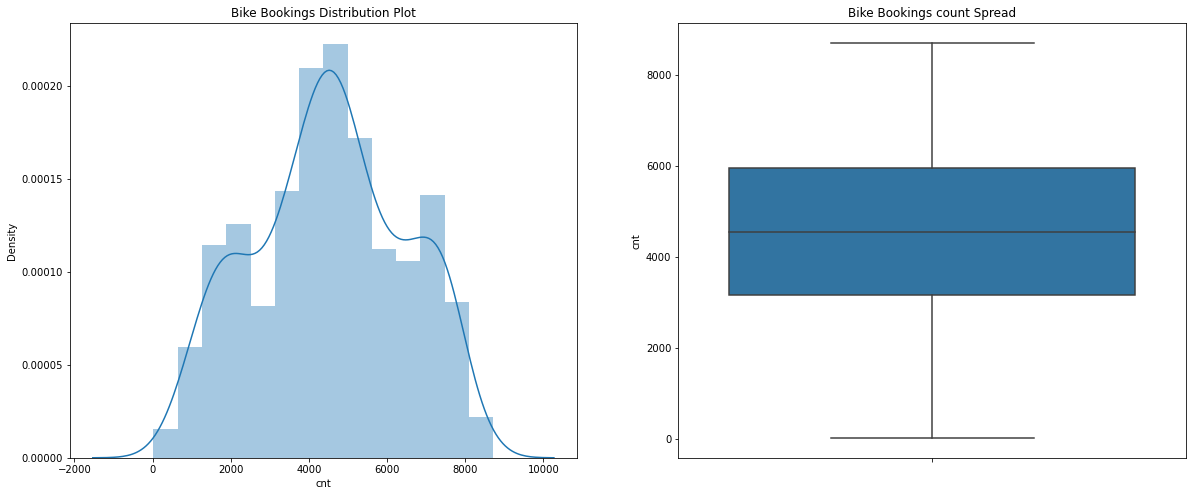

In [195]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Bike Bookings Distribution Plot') 
sns.distplot(bikeSharing['cnt']) #ploting dist plot for cnt

plt.subplot(1,2,2)
plt.title('Bike Bookings count Spread')
sns.boxplot(y=bikeSharing['cnt'])#boxplot dist plot for cnt

plt.show()

#### _`Inference`_: 
- The number of bikes booked ranges from 0 to about 8700
- 50% of bookings was done for about 4500 or 4600

###  Visualising the Numeric variables

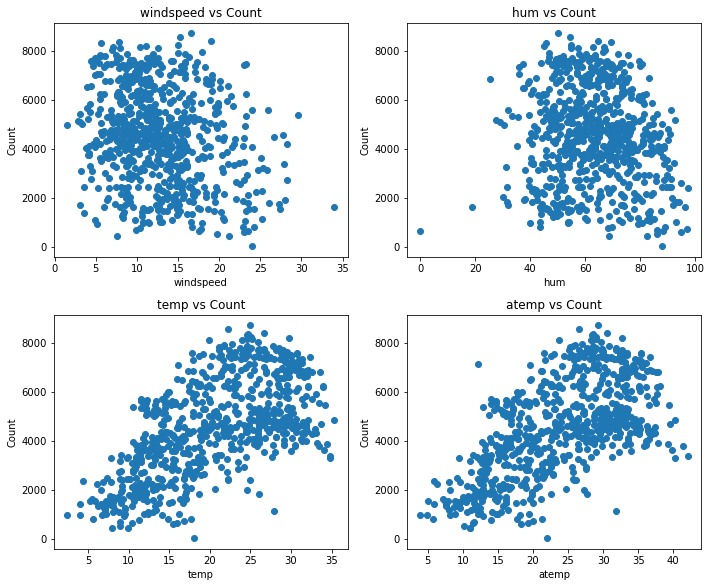

In [196]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(bikeSharing[x],bikeSharing['cnt'])
    plt.title(x+' vs Count')
    plt.ylabel('Count')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('windspeed', 1) #ploting scatter plot windspeed vs cnt
scatter('hum', 2)#ploting scatter plot hum vs cnt
scatter('temp', 3)#ploting scatter plot temp vs cnt
scatter('atemp', 4)#ploting scatter plot atemp vs cnt

plt.tight_layout()

#### _`Inference`_: 
- temp and atemp seem to be having a linear relationship with the cnt.
- temp and ateap seem to be highly corelated with temp compared to other variables

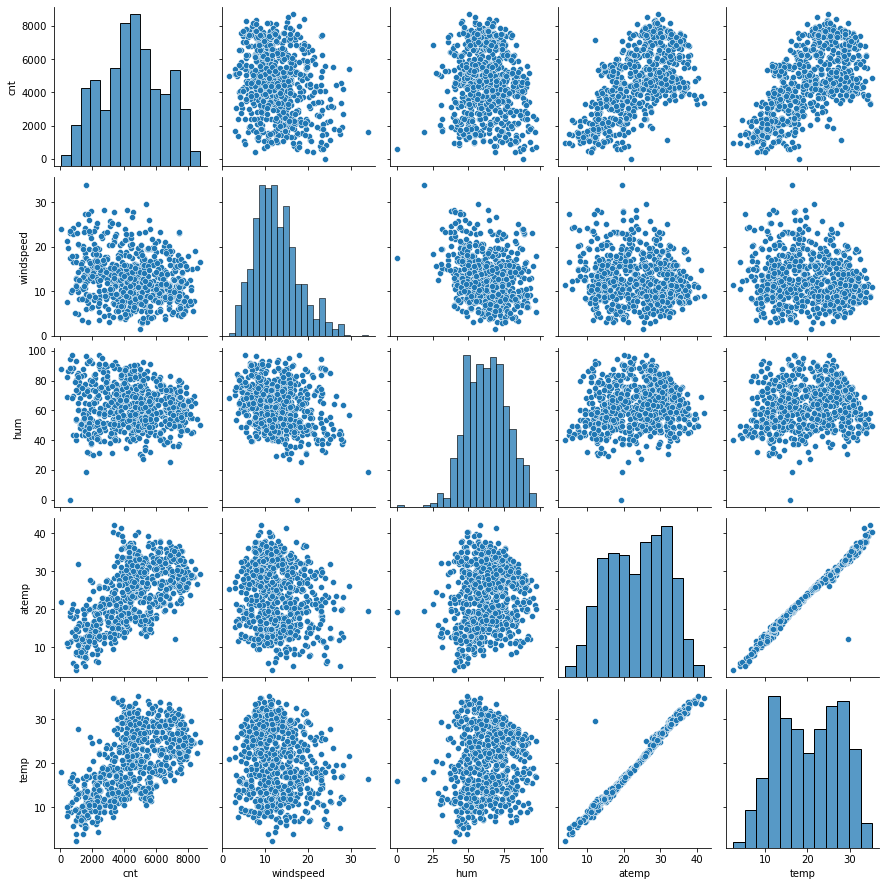

In [197]:
sns.pairplot(bikeSharing, vars=['cnt','windspeed','hum','atemp','temp']) #pair plot for all continuous vars
plt.show()

#### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

### Visualising Categorical Variables

In [198]:
var =['season','yr','holiday','weekday','workingday','weathersit']


#function for boxplot for categorical variables
def plt_cat(var,cnt):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(var)):
        plt.subplot(3,2,i+1)
        sns.boxplot(x = var[i], y = cnt, data = bikeSharing)
    plt.show()
    
    
#annotation for bar graph
def ann_h(df):
   
    totals = []

    # find the values and append to list
    for i in df.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in df.patches:
        # get_x pulls left or right; get_height pushes up or down
        df.text(i.get_x()+.15, i.get_height()+.30, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=15)
        
#function for barplot for categorical variables      
def box_cat(var,cnt):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(var)):
        plt.subplot(3,2,i+1)
        A=sns.barplot(x = var[i], y = cnt, data = bikeSharing)
        ann_h(A)
    plt.show()

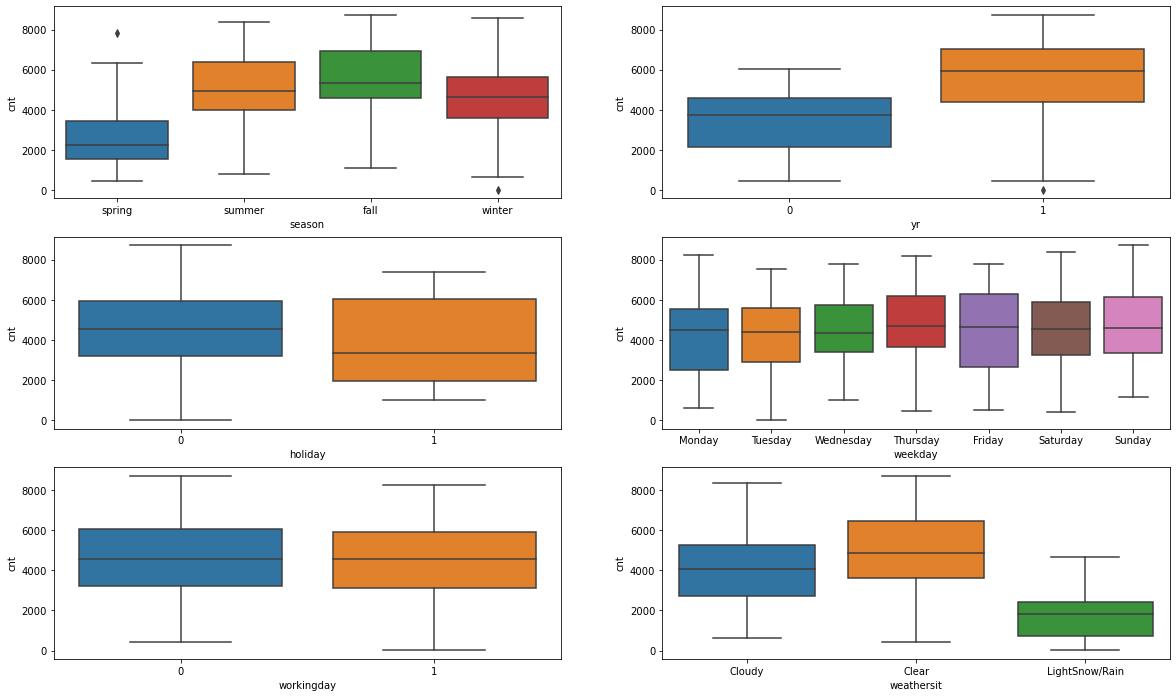

In [199]:


plt_cat(var,'cnt') #boxplt for categorical variables 'season','yr','holiday','weekday','workingday','weathersit' and 'cnt'

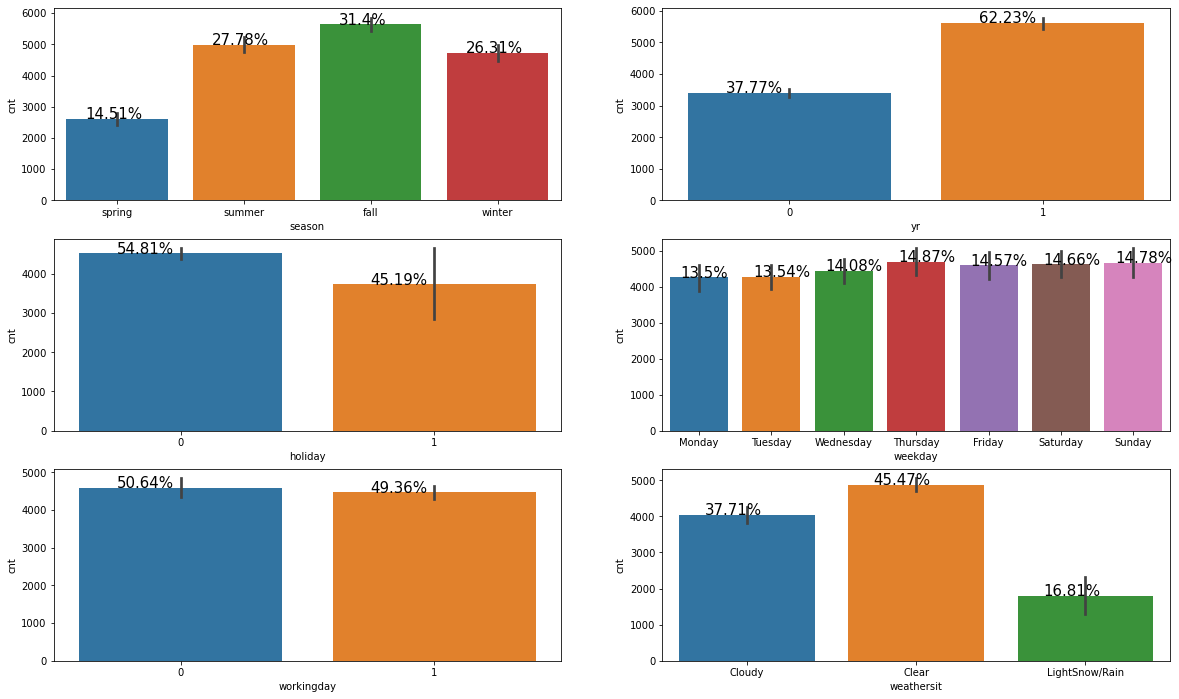

In [200]:

box_cat(var,cnt='cnt') #barplt for categorical variables 'season','yr','holiday','weekday','workingday','weathersit' and 'cnt'

#### _`Inference`_: 

- 31.4% of bikes were booked in fall, of which 75% of the bikes booked in fall was between 6000 and 8000
- Bike booked in 2018 was about 37.7% and 2019 was 62.23%, there has been a sharp increse in the number of bikes booked from 2018 and 2019. There has been almost 25% increase.
- Suprisingly the number bikes boomed during holiday is lesser than ones booked during ones its not a holiday, However the number of bikes booked during a working day is almost same as that of non working day.
- Starting of weekday there has been less bikes booked and this increases but is almost steady from Wednesday, Thrusdays and Sundays have the highest bikes booked.
- About 45.47% of the bikes are booked during clear days, that would be due to the day being perfect for riding a bike. Days with Light Snow/Rain has the least bikes bookes, with 50% of the bikes booked is between 1000 and 2000 during Light Snow/Rain which is not ideal for bike ride. 


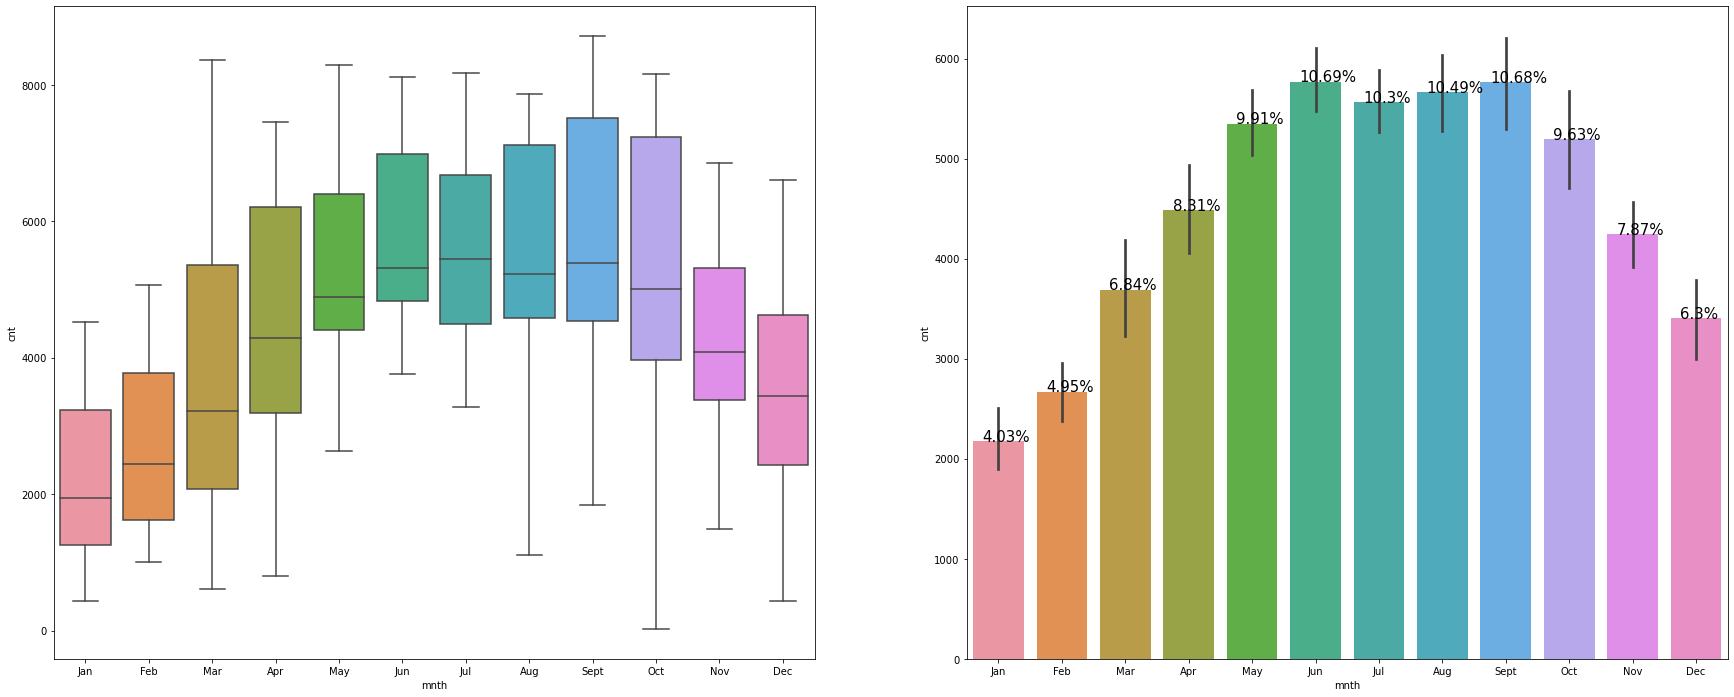

In [201]:
#ploting for month
plt.figure(figsize=(30,12))
plt.subplot(1,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing) #boxplt for mnth and 'cnt'
plt.subplot(1,2,2)
A=sns.barplot(x = 'mnth', y = 'cnt', data = bikeSharing)#barplt for mnth and 'cnt'
ann_h(A)
plt.show()

### _`Inference`_: 
- June and September had the highest bookings, After which August and July has second highest sales. It could be that between June to September the weather for ideal for bike ride.
- January and February has the least bike bookings

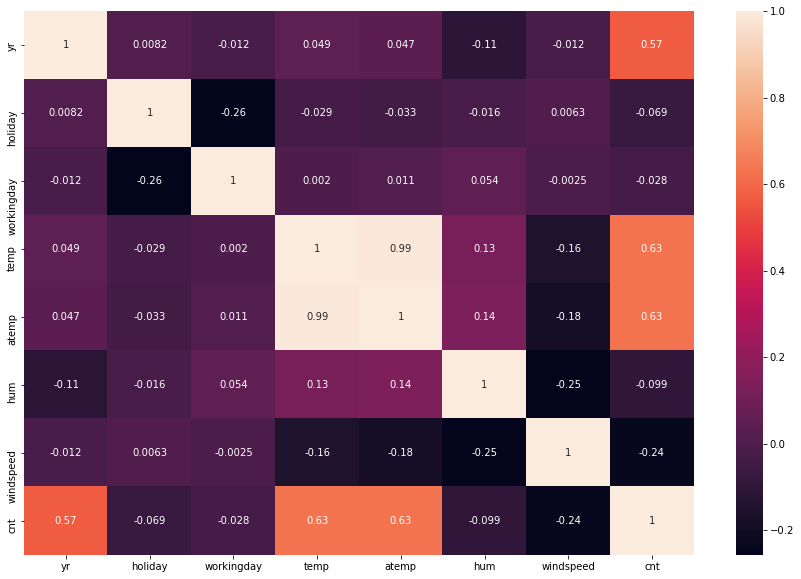

In [202]:
#Finding Correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(bikeSharing.corr(), annot = True)
plt.show()

#### _`Inference`_: 
- Holiday, workingday, humidity and windspeed have negative coreelaation with target variable cnt.
- temp and atemp have the highest co-relation with cnt
- temp and atemp have high co-relation with each other 0.99, we could drop one of them.

In [203]:
#dropping a atemp from bikeSharing
bikeSharing.drop(['atemp'], axis=1,inplace=True)

In [204]:
#checking the final dataframe for the modeling 
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [205]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [206]:
bikeSharing.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


# _`Data Preparation`_

### Dummy Variables
The categorical string variables have to be converted to integer values for the modelling 

In [207]:
mon=pd.get_dummies(bikeSharing['mnth'],drop_first=True)#dropping first as n-1 dummy variables are suffice
week=pd.get_dummies(bikeSharing['weekday'],drop_first=True)#dropping first as n-1 dummy variables are suffice
weather=pd.get_dummies(bikeSharing['weathersit'],drop_first=True)#dropping first as n-1 dummy variables are suffice
seasons=pd.get_dummies(bikeSharing['season'],drop_first=True)#dropping first as n-1 dummy variables are suffice

In [208]:
bikeSharing=pd.concat([mon,week,weather,seasons,bikeSharing],axis=1) #concating the dummy varibales with bikeSharing dataframe
bikeSharing.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [209]:
bikeSharing.info() #check the final dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    uint8  
 1   Dec             730 non-null    uint8  
 2   Feb             730 non-null    uint8  
 3   Jan             730 non-null    uint8  
 4   Jul             730 non-null    uint8  
 5   Jun             730 non-null    uint8  
 6   Mar             730 non-null    uint8  
 7   May             730 non-null    uint8  
 8   Nov             730 non-null    uint8  
 9   Oct             730 non-null    uint8  
 10  Sept            730 non-null    uint8  
 11  Monday          730 non-null    uint8  
 12  Saturday        730 non-null    uint8  
 13  Sunday          730 non-null    uint8  
 14  Thursday        730 non-null    uint8  
 15  Tuesday         730 non-null    uint8  
 16  Wednesday       730 non-null    uint8  
 17  Cloudy          730 non-null    uin

In [210]:
#droping the original categorical columns 
bikeSharing.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [211]:
bikeSharing.info()#check the final dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    uint8  
 1   Dec             730 non-null    uint8  
 2   Feb             730 non-null    uint8  
 3   Jan             730 non-null    uint8  
 4   Jul             730 non-null    uint8  
 5   Jun             730 non-null    uint8  
 6   Mar             730 non-null    uint8  
 7   May             730 non-null    uint8  
 8   Nov             730 non-null    uint8  
 9   Oct             730 non-null    uint8  
 10  Sept            730 non-null    uint8  
 11  Monday          730 non-null    uint8  
 12  Saturday        730 non-null    uint8  
 13  Sunday          730 non-null    uint8  
 14  Thursday        730 non-null    uint8  
 15  Tuesday         730 non-null    uint8  
 16  Wednesday       730 non-null    uint8  
 17  Cloudy          730 non-null    uin

In [212]:
bikeSharing.head()#check the final dataframe

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [213]:
bikeSharing.shape

(730, 29)

In [214]:
#importing libraries for modelling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor



### Splitting the Data into Training and Testing Sets

In [215]:
# We specify seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [216]:
#checking shape of train and test dataframe
print("Train df",df_train.shape)
print("Test df",df_test.shape)

Train df (510, 29)
Test df (219, 29)


In [217]:
df_train.head() #checking train set

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,19.201653,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,16.980847,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,10.489153,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,15.443347,48.9583,8.708325,4220


In [218]:
df_train.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'LightSnow/Rain', 'spring', 'summer', 'winter',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [219]:
df_test.columns #checking test set

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'LightSnow/Rain', 'spring', 'summer', 'winter',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [220]:
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,29.315000,30.5000,19.583229,4968


### Rescaling the Features 
using Min-Max scaling

In [221]:
scaler = MinMaxScaler() #creting scaler for minmax Sacling

In [222]:

# Applying scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) #fit_transform as we are using train date to fit min and max value and tranform this data as per the scaling 

df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [223]:
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### All variables are in range 0 to 1

In [224]:
bikeSharing.columns


Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sept', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'LightSnow/Rain', 'spring', 'summer', 'winter',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

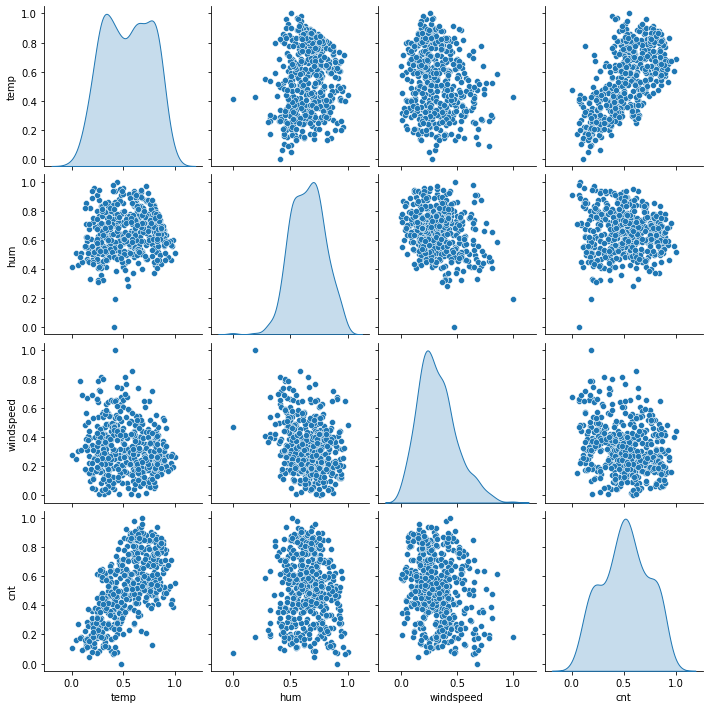

In [225]:
# pairplot for numerical continuous data 
sns.pairplot(df_train[[ 'temp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

#### _`Inference`_: 
- The number of bikes booked ranges from 0 to about 8700
- 50% of bookings was done for about 4500 or 4600

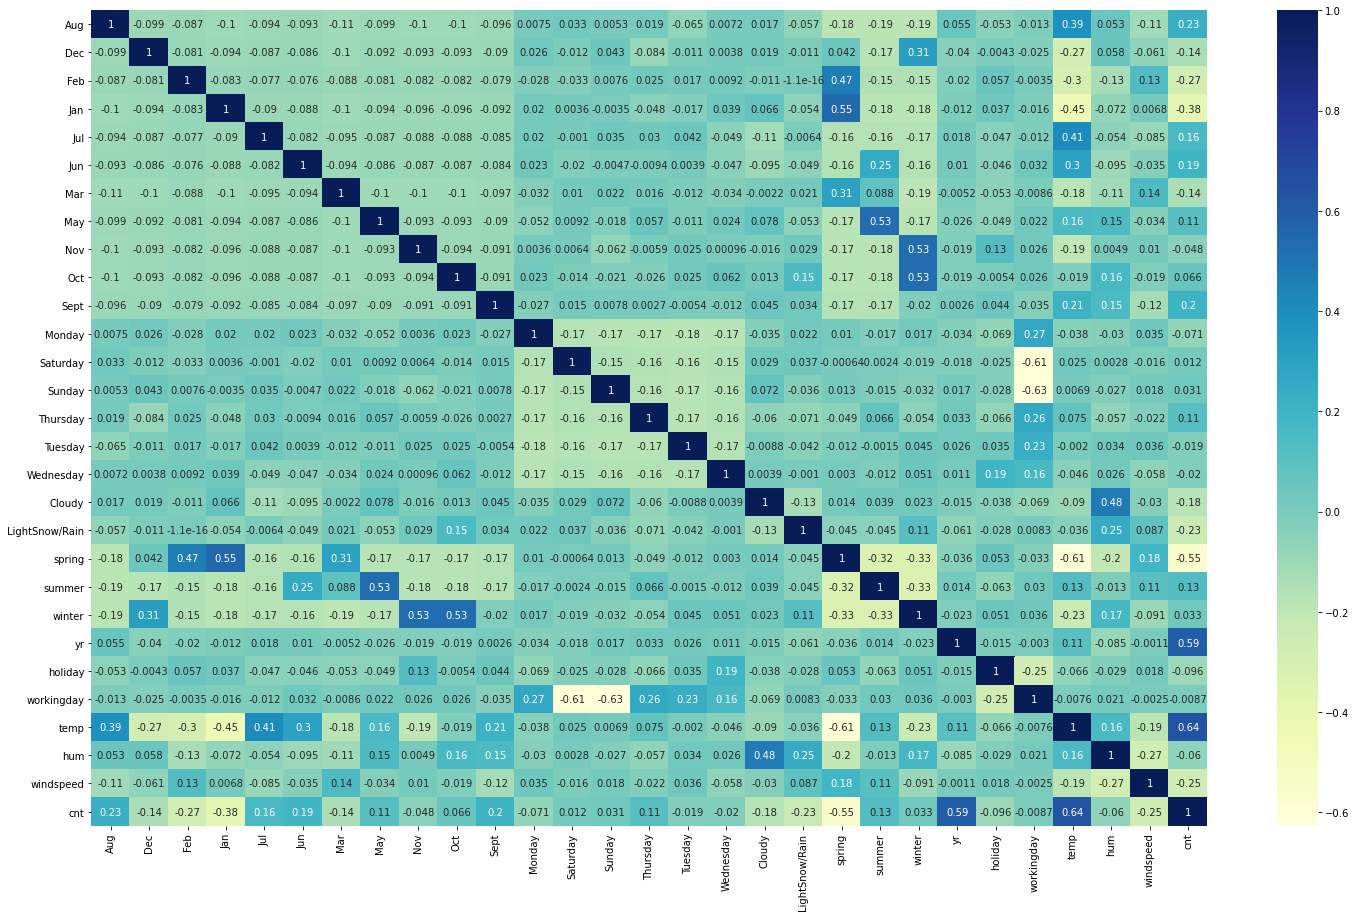

In [226]:
# checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### _`Inference`_: 
- The continous numberic variabled seem to have linear relationship with cnt, linear regression is a good model for the study.
- Year, temp and spring seem to be having high corelation with the target varibale cnt.

### Dividing into X and Y sets for the model building

In [227]:
y_train=df_train.pop('cnt') #divding the train set into y_train by using the dependent variable
X_train=df_train #divding the train set into X_train

# _` Data Modelling and Evaluation`_

In [228]:
#Functions for medelling and VIF

def model_build (X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    return lm.summary() # model summary
    
    
def VIF(X_train):
    
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)



In [229]:
model_build(X_train, y_train) #building model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        16:08:27   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3945      0.085      4.640      0.000       0.227       0.562
Aug                0.0215      0.034      0.632      0.527      -0.045       0.088
Dec               -0.0457      0.034     -1.348      0.178      -0.112       0.021
Feb               -0.0373      0.033     -1.121      0.263      -0.103       0.028
Jan               -0.0636      0.034     -1.880      0.061      -0.130       0.003
Jul               -0.0349      0.035     -0.985      0.325      -0.105       0.035
Jun                0.0010      0.025      0.038      0.969      -0.049       0.051
Mar                0.0006      0.025      0.025      0.980      -0.048       0.049
May                0.0241      0.021      1.134      0.257      -0.018       0.066
Nov               -0.0416      0.037     -1.133      0.258      -0.114       0.031
Oct                0.0058      0.036      0.160      0.873      -0.065       0.077
Sept               0.0861      0.032      2.667      0.008       0.023       0.149
Monday            -0.0246      0.015     -1.690      0.092      -0.053       0.004
Saturday          -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sunday            -0.0500      0.071     -0.699      0.485      -0.190       0.091
Thursday           0.0039      0.015      0.258      0.796      -0.026       0.033
Tuesday           -0.0263      0.015     -1.792      0.074      -0.055       0.003
Wednesday         -0.0112      0.015     -0.736      0.462      -0.041       0.019
Cloudy            -0.0594      0.011     -5.637      0.000      -0.080      -0.039
LightSnow/Rain    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
summer             0.0422      0.026      1.598      0.111      -0.010       0.094
winter             0.1109      0.028      3.938      0.000       0.056       0.166
yr                 0.2309      0.008     28.387      0.000       0.215       0.247
holiday           -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday        -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp               0.4455      0.047      9.513      0.000       0.353       0.537
hum               -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed         -0.1830      0.026     -7.036      0.000      -0.234      -0.132
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================

In [230]:
VIF(X_train) #check VIF

,Features,VIF
24,workingday,63.89
25,temp,43.99
26,hum,41.17
19,spring,13.54
21,winter,12.51
13,Sunday,12.35
12,Saturday,11.83
20,summer,9.84
8,Nov,7.16
9,Oct,6.96


#### _`Inference`_: 
 - Although the Adj R-squared value is 0.84, the model has many variables. A model with lesser variables is considered a better model.
 - Many of these feautures have p value greater than 0.05
 - 16 vars have VIF greater than 5


#### ITS ALWAYS BETTER TO HAVE A MODEL WITH LESSER VARIABLE, PERFORMING FURTHER MODELLING.

### Performing RFE to identify variables to be used

In [231]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)



In [232]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) #creating a list of X_train.columns,rfe.support_,rfe.ranking_

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Cloudy', True, 1),
 ('LightSnow/Rain', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [233]:
col = X_train.columns[rfe.support_] # all columns with 'True' suppport
col

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sept', 'Cloudy', 'LightSnow/Rain',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [234]:
X_train.columns[~rfe.support_] #all columns with 'False' support

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [235]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

 ### <font color=blue> MODEL after RFE </font>

In [236]:
# Build model
model_build(X_train_rfe, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        16:08:27   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.886      0.000       0.249       0.391
Dec               -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan               -0.0437      0.018     -2.415      0.016      -0.079      -0.008
Jul               -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov               -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sept               0.0749      0.017      4.438      0.000       0.042       0.108
Cloudy            -0.0559      0.010     -5.338      0.000      -0.076      -0.035
LightSnow/Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer             0.0408      0.015      2.659      0.008       0.011       0.071
winter             0.1034      0.018      5.763      0.000       0.068       0.139
yr                 0.2303      0.008     28.511      0.000       0.214       0.246
holiday           -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp               0.4800      0.037     12.977      0.000       0.407       0.553
hum               -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed         -0.1885      0.026     -7.312      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
# Calculate the VIFs for the model to detect multicolinearity  

VIF(X_train_rfe)

,Features,VIF
13,hum,30.94
12,temp,17.80
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
5,Cloudy,2.32
10,yr,2.09
3,Nov,1.83
1,Jan,1.75


#### _`Inference`_: 
 - Although the Adj R-squared value is 0.84, the model has many variables hence. A model with lesser variables is considered a better model.
 - All variables have p value less than 0.05
 - hum and temp have VIF more than 5 (indicating multicolinearity) 


#### We will now model using manual method by checking p value and VIF. p value should be less than 0.05 and VIF less than 5

 ### <font color=blue> MODEL 1 </font>

Rebuilding by dropping `hum`

In [238]:
X_train_m1 = X_train_rfe.drop(["hum"], axis = 1) #droping hum

In [239]:

# Build model
model_build(X_train_m1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.57e-186
Time:                        16:08:27   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.679      0.000       0.184       0.310
Dec               -0.0445      0.018     -2.520      0.012      -0.079      -0.010
Jan               -0.0503      0.018     -2.738      0.006      -0.086      -0.014
Jul               -0.0504      0.018     -2.725      0.007      -0.087      -0.014
Nov               -0.0419      0.019     -2.198      0.028      -0.079      -0.004
Sept               0.0682      0.017      3.992      0.000       0.035       0.102
Cloudy            -0.0814      0.009     -9.359      0.000      -0.099      -0.064
LightSnow/Rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer             0.0333      0.015      2.148      0.032       0.003       0.064
winter             0.0887      0.018      4.951      0.000       0.053       0.124
yr                 0.2343      0.008     28.709      0.000       0.218       0.250
holiday           -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp               0.4377      0.036     12.083      0.000       0.366       0.509
windspeed         -0.1586      0.025     -6.290      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
VIF(X_train_m1) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
12,temp,5.17
13,windspeed,4.67
9,winter,2.94
7,spring,2.89
8,summer,2.23
10,yr,2.07
3,Nov,1.80
1,Jan,1.66
2,Jul,1.59
5,Cloudy,1.56


#### _`Inference`_: 
 - Although the Adj R-squared value is 0.835, the model has many variables hence. A model with lesser variables is considered a better model.
 - All variables have p value less then 0.05
 - temp has VIF more than 5, we need to drop this. (indicating multicolinearity) 

 ### <font color=blue> MODEL 2 </font>

Rebuilding by dropping `temp`

In [241]:
X_train_m2 = X_train_m1.drop(["temp"], axis = 1) #drop temp

In [242]:
#building model
model_build(X_train_m2,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.50e-160
Time:                        16:08:27   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5961      0.016     37.557      0.000       0.565       0.627
Dec               -0.1100      0.019     -5.752      0.000      -0.148      -0.072
Jan               -0.1202      0.020     -6.069      0.000      -0.159      -0.081
Jul               -0.0186      0.021     -0.894      0.372      -0.059       0.022
Nov               -0.1013      0.021     -4.847      0.000      -0.142      -0.060
Sept               0.0530      0.019      2.735      0.006       0.015       0.091
Cloudy            -0.0882      0.010     -8.938      0.000      -0.108      -0.069
LightSnow/Rain    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
spring            -0.2503      0.018    -14.146      0.000      -0.285      -0.216
summer            -0.0511      0.016     -3.252      0.001      -0.082      -0.020
winter            -0.0213      0.018     -1.216      0.225      -0.056       0.013
yr                 0.2454      0.009     26.627      0.000       0.227       0.264
holiday           -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed         -0.1903      0.029     -6.675      0.000      -0.246      -0.134
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
VIF(X_train_m2)# Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
12,windspeed,3.88
7,spring,2.89
9,winter,2.84
8,summer,2.01
10,yr,1.83
3,Nov,1.79
1,Jan,1.64
5,Cloudy,1.52
0,Dec,1.45
2,Jul,1.20


#### _`Inference`_: 
 - The Adj R-squared value is 0.787, the model has many variables hence. A model with lesser variables is considered a better model.
 - p Value of Jul and winter is more than 0.05, we will drop Jul for now
 - no variable has VIF higher than 5

 ### <font color=blue> MODEL 3 </font>

Rebuilding by dropping `Jul` 

In [244]:
X_train_m3 = X_train_m2.drop(["Jul"], axis = 1) #drop Jul

In [245]:
model_build(X_train_m3,y_train) # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.36e-161
Time:                        16:08:27   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5892      0.014     42.571      0.000       0.562       0.616
Dec               -0.1094      0.019     -5.727      0.000      -0.147      -0.072
Jan               -0.1202      0.020     -6.070      0.000      -0.159      -0.081
Nov               -0.1006      0.021     -4.814      0.000      -0.142      -0.060
Sept               0.0583      0.018      3.162      0.002       0.022       0.095
Cloudy            -0.0876      0.010     -8.899      0.000      -0.107      -0.068
LightSnow/Rain    -0.3128      0.028    -11.213      0.000      -0.368      -0.258
spring            -0.2437      0.016    -15.140      0.000      -0.275      -0.212
summer            -0.0445      0.014     -3.210      0.001      -0.072      -0.017
winter            -0.0155      0.016     -0.951      0.342      -0.047       0.016
yr                 0.2455      0.009     26.644      0.000       0.227       0.264
holiday           -0.0853      0.030     -2.886      0.004      -0.143      -0.027
windspeed         -0.1902      0.029     -6.671      0.000      -0.246      -0.134
==============================================================================
Omnibus:                       56.910   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.384
Skew:                          -0.593   Prob(JB):                     6.59e-30
Kurtosis:                       5.218   Cond. No.                         8.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
VIF(X_train_m3) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
11,windspeed,3.52
8,winter,2.74
6,spring,2.71
7,summer,1.86
2,Nov,1.79
9,yr,1.77
1,Jan,1.64
4,Cloudy,1.52
0,Dec,1.45
3,Sept,1.16


#### _`Inference`_: 
- The Adj R2 is 0.787 same as Model 2
- p Value of winter is greater than 0.5, we will drop winter
- all variables have less than 5 VIF

 ### <font color=blue> MODEL 4 </font>

Rebuilding by droping `winter`

In [247]:
X_train_m4 = X_train_m3.drop(["winter"], axis = 1) #drop winter 

In [248]:
model_build(X_train_m4,y_train)  # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.42e-162
Time:                        16:08:27   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5845      0.013     45.172      0.000       0.559       0.610
Dec               -0.1169      0.017     -6.725      0.000      -0.151      -0.083
Jan               -0.1215      0.020     -6.150      0.000      -0.160      -0.083
Nov               -0.1107      0.018     -6.167      0.000      -0.146      -0.075
Sept               0.0602      0.018      3.287      0.001       0.024       0.096
Cloudy            -0.0884      0.010     -9.008      0.000      -0.108      -0.069
LightSnow/Rain    -0.3160      0.028    -11.416      0.000      -0.370      -0.262
spring            -0.2372      0.015    -16.294      0.000      -0.266      -0.209
summer            -0.0392      0.013     -3.087      0.002      -0.064      -0.014
yr                 0.2456      0.009     26.656      0.000       0.228       0.264
holiday           -0.0855      0.030     -2.892      0.004      -0.144      -0.027
windspeed         -0.1910      0.028     -6.706      0.000      -0.247      -0.135
==============================================================================
Omnibus:                       60.373   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.031
Skew:                          -0.617   Prob(JB):                     1.18e-32
Kurtosis:                       5.323   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
VIF(X_train_m4) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
10,windspeed,3.22
6,spring,2.36
8,yr,1.74
7,summer,1.69
1,Jan,1.62
4,Cloudy,1.47
2,Nov,1.23
3,Sept,1.16
0,Dec,1.13
5,LightSnow/Rain,1.06


#### _`Inference`_: 
- The Adj R2 is now 0.787
- all p value is less than 0.05
- VIF is less than 5 for all

#### Let us now drop variables based on observation and ultimately obtain the best model

 ### <font color=blue> MODEL 5 </font>

Rebuilding the `MODEL 4` without `Summer` 

In [250]:
X_train_m5 = X_train_m4.drop(["summer"], axis = 1) #since summer has the least absolute coeffient value, drop summer

In [251]:
model_build(X_train_m5,y_train) # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.82e-161
Time:                        16:08:27   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5719      0.012     46.206      0.000       0.548       0.596
Dec               -0.1047      0.017     -6.132      0.000      -0.138      -0.071
Jan               -0.1203      0.020     -6.037      0.000      -0.159      -0.081
Nov               -0.0929      0.017     -5.419      0.000      -0.127      -0.059
Sept               0.0770      0.018      4.362      0.000       0.042       0.112
Cloudy            -0.0903      0.010     -9.149      0.000      -0.110      -0.071
LightSnow/Rain    -0.3103      0.028    -11.140      0.000      -0.365      -0.256
spring            -0.2202      0.014    -16.201      0.000      -0.247      -0.194
yr                 0.2462      0.009     26.500      0.000       0.228       0.264
holiday           -0.0862      0.030     -2.892      0.004      -0.145      -0.028
windspeed         -0.2062      0.028     -7.287      0.000      -0.262      -0.151
==============================================================================
Omnibus:                       56.606   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.699
Skew:                          -0.624   Prob(JB):                     6.17e-27
Kurtosis:                       5.031   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
VIF(X_train_m5) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
9,windspeed,2.47
6,spring,2.09
7,yr,1.72
1,Jan,1.62
4,Cloudy,1.44
2,Nov,1.15
3,Sept,1.11
0,Dec,1.10
5,LightSnow/Rain,1.06
8,holiday,1.06


#### _`Inference`_: 
- The Adj R2 is 0.784 which is still a good value, although there is a slight dip.
- all p value is less than 0.05 and VIF less than 5


### <font color=blue> MODEL 6 </font>

Rebuilding the `MODEL 5` without `holiday`

In [253]:
X_train_m6 = X_train_m5.drop(["holiday"], axis = 1) #since holiday has the least absolute coeffient value, drop holiday

In [254]:
model_build(X_train_m6, y_train)  # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.47e-160
Time:                        16:08:27   Log-Likelihood:                 429.75
No. Observations:                 510   AIC:                            -839.5
Df Residuals:                     500   BIC:                            -797.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5710      0.012     45.814      0.000       0.547       0.596
Dec               -0.1055      0.017     -6.134      0.000      -0.139      -0.072
Jan               -0.1212      0.020     -6.039      0.000      -0.161      -0.082
Nov               -0.1003      0.017     -5.869      0.000      -0.134      -0.067
Sept               0.0730      0.018      4.121      0.000       0.038       0.108
Cloudy            -0.0890      0.010     -8.959      0.000      -0.109      -0.069
LightSnow/Rain    -0.3072      0.028    -10.957      0.000      -0.362      -0.252
spring            -0.2227      0.014    -16.296      0.000      -0.250      -0.196
yr                 0.2465      0.009     26.342      0.000       0.228       0.265
windspeed         -0.2073      0.029     -7.275      0.000      -0.263      -0.151
==============================================================================
Omnibus:                       64.617   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.630
Skew:                          -0.680   Prob(JB):                     8.76e-33
Kurtosis:                       5.257   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
VIF(X_train_m6)# Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
8,windspeed,2.47
6,spring,2.08
7,yr,1.72
1,Jan,1.62
4,Cloudy,1.44
2,Nov,1.12
0,Dec,1.10
3,Sept,1.10
5,LightSnow/Rain,1.06


#### _`Inference`_: 
- The Adj R2 is 0.781, which is still a good value.
- This model has lesser variable than older models, this is currently the <font color=red> better model compared to others </font>
- all p value is 0 and VIF less than 5


### <font color=blue> MODEL 7</font>

Rebuilding the `MODEL 6` without `Sept`

In [256]:
X_train_m7 = X_train_m6.drop(["Sept"], axis = 1) #dropping Sept with least coef

In [257]:
model_build(X_train_m7, y_train)  # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.62e-158
Time:                        16:08:27   Log-Likelihood:                 421.23
No. Observations:                 510   AIC:                            -824.5
Df Residuals:                     501   BIC:                            -786.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5833      0.012     47.440      0.000       0.559       0.607
Dec               -0.1130      0.017     -6.509      0.000      -0.147      -0.079
Jan               -0.1235      0.020     -6.063      0.000      -0.164      -0.083
Nov               -0.1094      0.017     -6.358      0.000      -0.143      -0.076
Cloudy            -0.0869      0.010     -8.620      0.000      -0.107      -0.067
LightSnow/Rain    -0.3022      0.028    -10.619      0.000      -0.358      -0.246
spring            -0.2295      0.014    -16.658      0.000      -0.257      -0.202
yr                 0.2463      0.010     25.905      0.000       0.228       0.265
windspeed         -0.2193      0.029     -7.614      0.000      -0.276      -0.163
==============================================================================
Omnibus:                       67.625   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.473
Skew:                          -0.714   Prob(JB):                     7.78e-34
Kurtosis:                       5.266   Cond. No.                         8.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
VIF(X_train_m7) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
7,windspeed,2.44
5,spring,2.06
6,yr,1.70
1,Jan,1.62
3,Cloudy,1.41
2,Nov,1.11
0,Dec,1.09
4,LightSnow/Rain,1.06


#### _`Inference`_: 
- The Adj R2 is 0.774, which is lesser than previous model
- all p value is 0 and VIF less than 5
- lets try to build a model by dropping a different variable

### <font color=blue> MODEL 8</font>

Rebuilding the `MODEL 6` without `Cloudy`

In [259]:
X_train_m8 = X_train_m6.drop(["Cloudy"], axis = 1) #dropping Cloudly with next least coef

In [260]:
model_build(X_train_m8, y_train)   # Build model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     187.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.17e-145
Time:                        16:08:27   Log-Likelihood:                 391.79
No. Observations:                 510   AIC:                            -765.6
Df Residuals:                     501   BIC:                            -727.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5395      0.013     41.927      0.000       0.514       0.565
Dec               -0.1100      0.018     -5.945      0.000      -0.146      -0.074
Jan               -0.1335      0.022     -6.199      0.000      -0.176      -0.091
Nov               -0.0999      0.018     -5.433      0.000      -0.136      -0.064
Sept               0.0648      0.019      3.401      0.001       0.027       0.102
LightSnow/Rain    -0.2760      0.030     -9.218      0.000      -0.335      -0.217
spring            -0.2198      0.015    -14.948      0.000      -0.249      -0.191
yr                 0.2484      0.010     24.669      0.000       0.229       0.268
windspeed         -0.2057      0.031     -6.707      0.000      -0.266      -0.145
==============================================================================
Omnibus:                       75.550   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.962
Skew:                          -0.850   Prob(JB):                     3.33e-32
Kurtosis:                       4.982   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
VIF(X_train_m8) # Calculate the VIFs for the model to detect multicolinearity  


,Features,VIF
7,windspeed,2.27
5,spring,2.08
6,yr,1.70
1,Jan,1.61
2,Nov,1.12
0,Dec,1.09
3,Sept,1.08
4,LightSnow/Rain,1.05


#### _`Inference`_: 
- The Adj R2 dipped by 0.746
- all p value is 0 except Sept, VIF is less than 5 for all


### <font color=blue> From the above models we can see that MODEL 6 is the better model compared to others models, MODEL 5 is also acceptable</font>

#### Let us now continue with Residual Ananlysis

## RESIDUAL ANALYSIS 

In [262]:
#definitaion to check residual analysis
def res_check(x):
    lm = sm.OLS(y_train,x).fit() #fit the model
    y_train_pr = lm.predict(x) #predict y using lm

    fig = plt.figure()
    sns.distplot((y_train - y_train_pr), bins = 20) #plot dist between y predicted and actual y value 
    fig.suptitle('Error Terms', fontsize = 20)                  
    plt.xlabel('Errors', fontsize = 18) 

#####  RESIDUAL ANALYSIS FOR MODEL 6

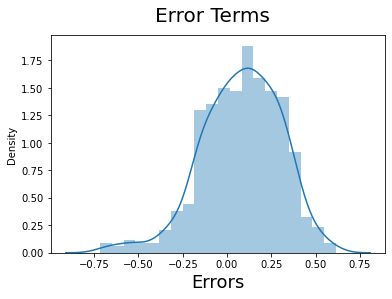

In [263]:
res_check(X_train_m6) #residual anlysis for MODEL 6

#####  RESIDUAL ANALYSIS FOR MODEL 5

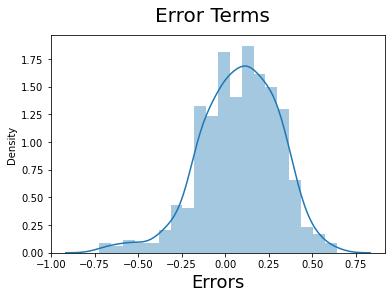

In [264]:
res_check(X_train_m5) #residual anlysis for MODEL 5

#### _`Inference`_: 

ASSUMPTIONS ABOUT RESIDUALS
- Residuals should be normally distributed
- Should have mean 0 
- Should have constant variance (homoscedasticity)
- Residual terms are indepndent of each other.


<font color=Purple> BOTH MODEL 5 AND 6 MEET THE CONDITIONS</font>



##### <font color=Red> MODEL 6 IS BETTER MODEL WITH Adj. R-squared:0.781 AND 9 INDEPNEDENT VARIABLES </font>
##### <font color=red> MODEL 5 HAS Adj. R-squared:0.784 AND 10 INDEPNEDENT VARIABLES </font>

###### Its better to have a model with lesser Adj R-Squared value and less independent variable

 ## Prediction and Evaluation

In [265]:
# Applying scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) #transform as we are using test and tranform this data as per the min and max scaling from train 

df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [266]:
#Dividing test into X and y
y_test = df_test.pop('cnt')
X_test = df_test

#### Prediction and Evaluation - MODEL 6

In [267]:
# Now let's use our model to make predictions.

# Creating X_test_m6 dataframe by dropping variables from X_test that isn't in our model
X_test_m6 = X_test[X_train_m6.columns]

# Adding a constant variable 
X_test_m6 = sm.add_constant(X_test_m6)

In [268]:
X_train_m6 = sm.add_constant(X_train_m6) #adding the constant to Model6
lm = sm.OLS(y_train,X_train_m6).fit()  #OLS for Model 6

In [269]:
y_pred = lm.predict(X_test_m6) #predict y values for train set 

In [270]:
# Evaluation of test via comparison of y_pred and y_test
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_pred) #R square value
print(r2)

0.7702528664276777


In [271]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test_m6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m6.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) #Adjusted R Square
adjusted_r2

0.7592073311597776

### R square is 0.77 and Adj R square is 0.759 for testset

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

#### _`Inference`_: 
- R Squared for Test set is 0.770, R Squared for train set is 0.784
- Adj R Squared for test set is 0.759, Adj R Squared for train set is 0.781



In [ ]:
lm.summary()

#### We can see that the equation of our best fitted line is:

##### <font color=red> cnt= 0.5710 -0.1055×Dec -0.1212xJan -0.1003xNov +0.0730×Sept -0.0890×Cloudy -0.3072xLightSnow/Rain -0.2227×Spring +0.2465×yr -0.2073xwindspeed </font>

From the model we can observe that 
- LightSnow/Rain  plays the major in cnt of bikes booked
- Dec, Jan, Nov, Cloudy, LightSnow/Rain, Spring and windspeed are inversly proportonal to cnt, which means decrease in any of the factors will increase cnt
- Sept and yr are directly proportional to cnt, which means increase in any of these factors will increase cnt


### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.